### This script contains the following:

#### 1. Import libraries and data
#### 2. Data prep
#### 3. The elbow technique
#### 4. K-means clustering
    3.1 Visualizations
    3.2 Descriptive statistics and insights
#### 5. Export data

### 1. Import libraries and data


In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [4]:
# Import data

path = r'C:\Users\C SaiVishwanath\Documents\08-2024 King County, Washington_House Sales Analysis'

house_sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_cleaned.csv'))

### 2. Data prep

In [6]:
house_sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house_sales.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
# Create 'age' column (years since built)
house_sales['age'] = 2024 - house_sales['yr_built']

In [9]:
house_sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37


In [10]:
# Create 'years_since_renovation' column
house_sales['years_since_renovation'] = np.where(
    house_sales['yr_renovated'] == 0,
    house_sales['age'], # If no renovation, use the house age
    2024 - house_sales['yr_renovated'] # If renovated, calculate years since renovation
)

In [11]:
house_sales.head(15)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,years_since_renovation
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,69,69
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,73,33
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,91,91
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,59,59
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,37,37
5,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,23,23
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,0,1995,0,98003,47.3097,-122.327,2238,6819,29,29
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,0,1963,0,98198,47.4095,-122.315,1650,9711,61,61
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,...,730,1960,0,98146,47.5123,-122.337,1780,8113,64,64
9,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,...,0,2003,0,98038,47.3684,-122.031,2390,7570,21,21


In [12]:
# Drop 'yr_built' and 'yr_renovated' columns
house_sales = house_sales.drop(columns=['yr_built', 'yr_renovated'])

In [13]:
house_sales.head(15)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,years_since_renovation
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,69,69
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,73,33
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,91,91
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,59,59
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,37,37
5,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,98053,47.6561,-122.005,4760,101930,23,23
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,98003,47.3097,-122.327,2238,6819,29,29
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,98198,47.4095,-122.315,1650,9711,61,61
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,98146,47.5123,-122.337,1780,8113,64,64
9,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,98038,47.3684,-122.031,2390,7570,21,21


In [14]:
# Create a subset containing only numerical variables
df_numerical = house_sales.drop(columns=['date', 'waterfront', 'lat', 'long', 'zipcode'])

In [15]:
df_numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age,years_since_renovation
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1340,5650,69,69
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1690,7639,73,33
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,2720,8062,91,91
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1360,5000,59,59
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1800,7503,37,37


In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

### 3. Elbow technique

In [18]:
# Define the number of potential clusters in the data
num_cl = range(1,10)

In [19]:
# Define a list of inertia values for each k-means clustering model
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_numerical)
    inertia.append(kmeans.inertia_)

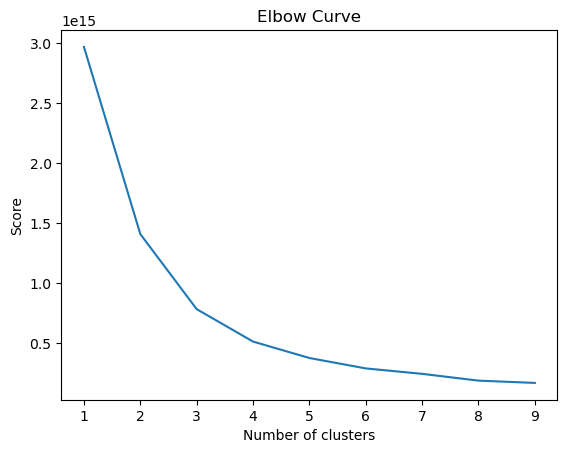

In [20]:
# Plot the scores to visualize the 'elbow'
pl.plot(num_cl,inertia)
pl.title('Elbow Curve')
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.show()

The curve begins to flatten out around 4 clusters. After 4, the reduction in score becomes less significant indicating that more clusters would greatly improve the model's fit. The ideal number of clusters for this dataset is 4. 

### 4. K-means clustering

In [23]:
# Create the kmeans object
Kmeans = KMeans(n_clusters=4)

In [24]:
# Fit the k-means object to the dataframe
Kmeans.fit(df_numerical)

KMeans(n_clusters=4)

In [25]:
# Create new column in dataframe to show the clusters
df_numerical['clusters'] = Kmeans.fit_predict(df_numerical)
df_numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age,years_since_renovation,clusters
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1340,5650,69,69,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1690,7639,73,33,2
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,2720,8062,91,91,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1360,5000,59,59,2
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1800,7503,37,37,0


In [26]:
df_numerical['clusters'].value_counts()

clusters
0    12957
2     7243
1     1222
3      190
Name: count, dtype: int64

#### 3.1 Visualizations

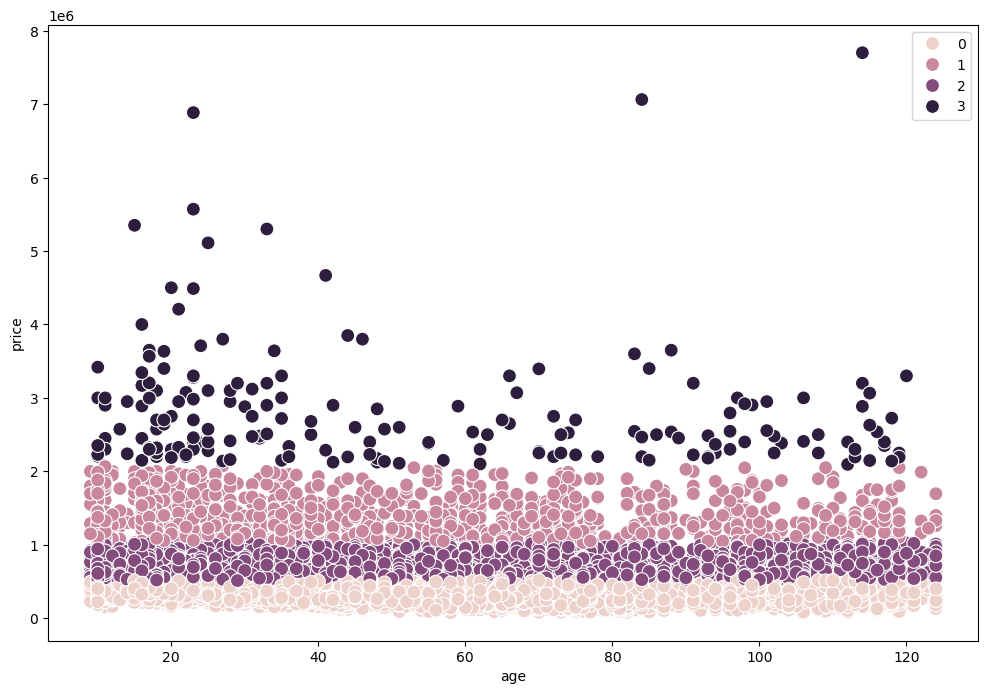

In [28]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['age'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

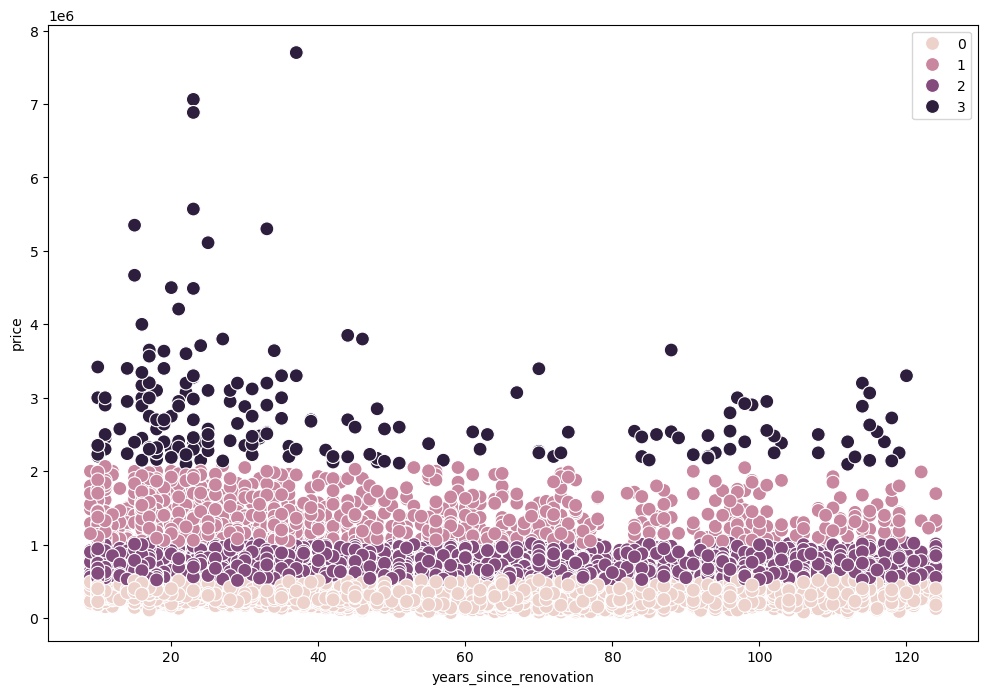

In [29]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['years_since_renovation'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

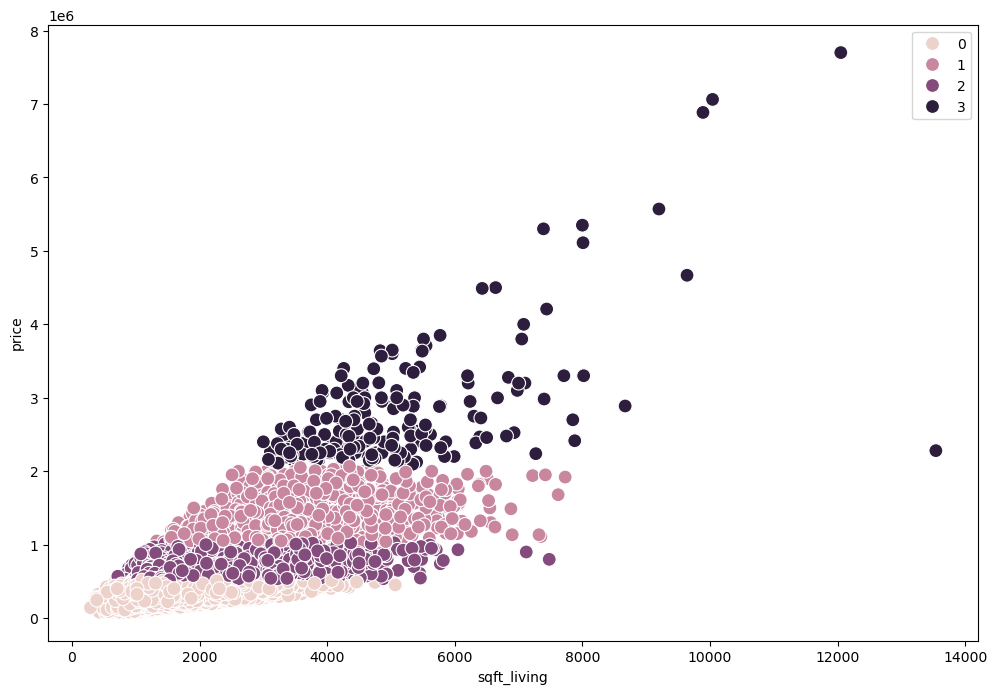

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['sqft_living'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

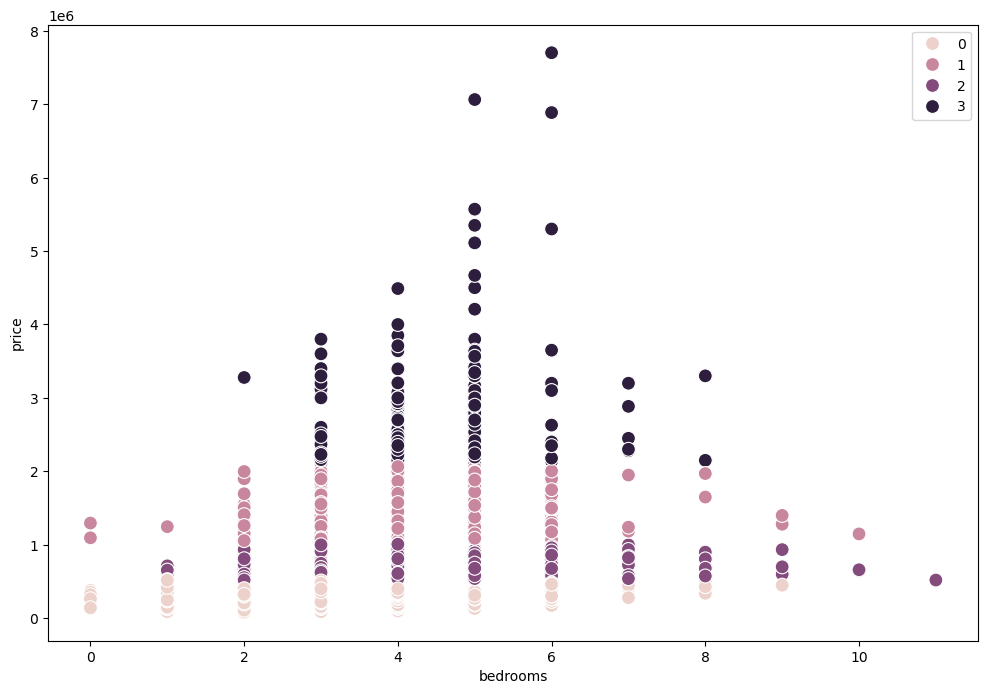

In [31]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['bedrooms'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

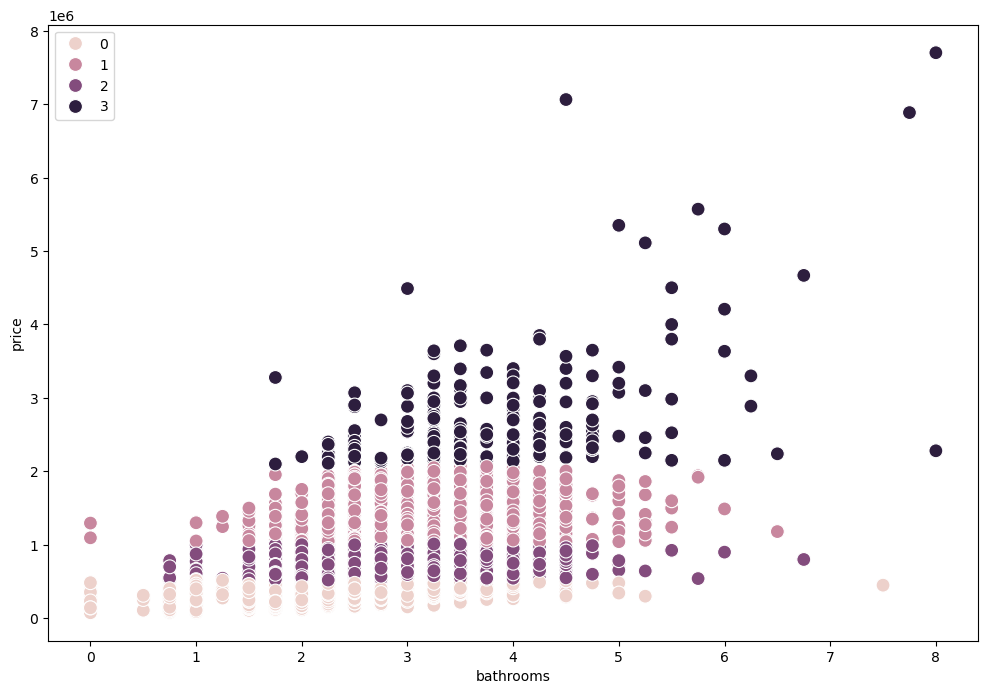

In [32]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['bathrooms'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

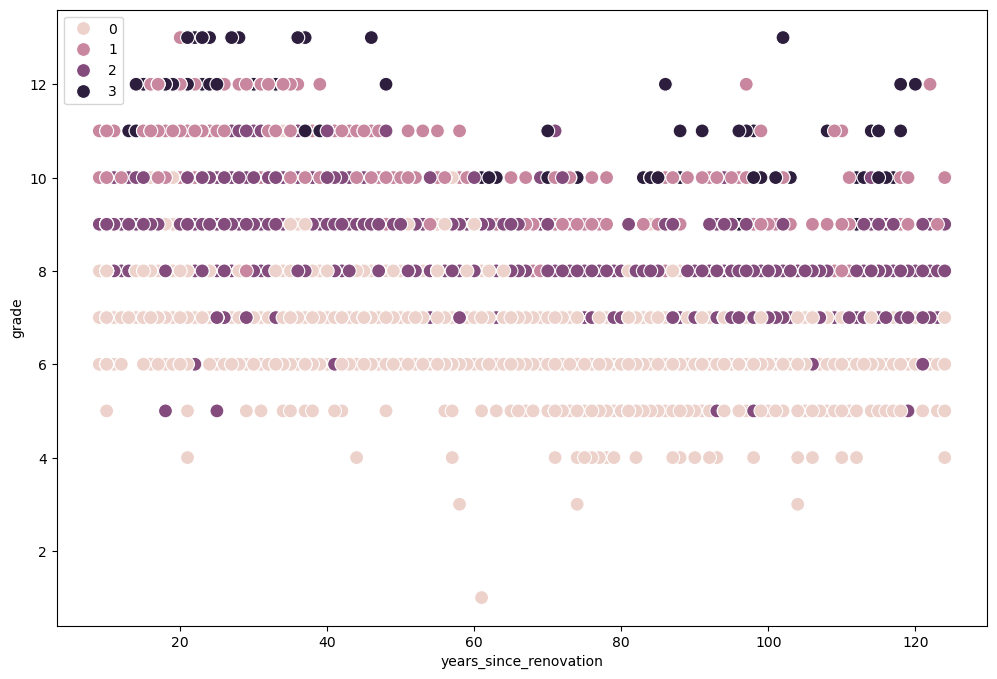

In [33]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['years_since_renovation'], y=df_numerical['grade'], hue = Kmeans.labels_, s=100)

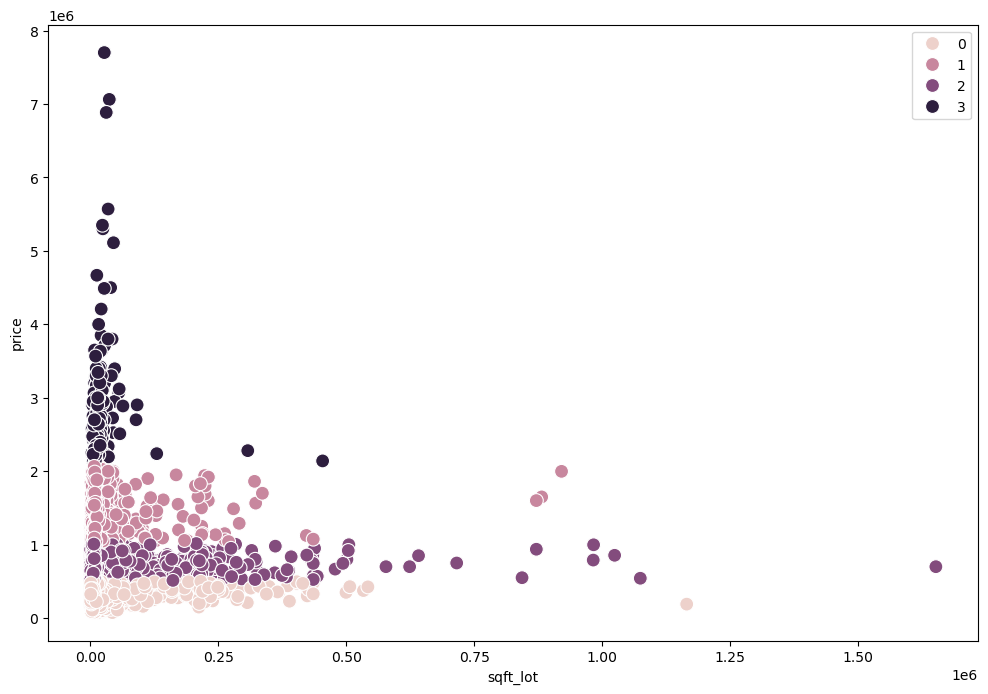

In [34]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['sqft_lot'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

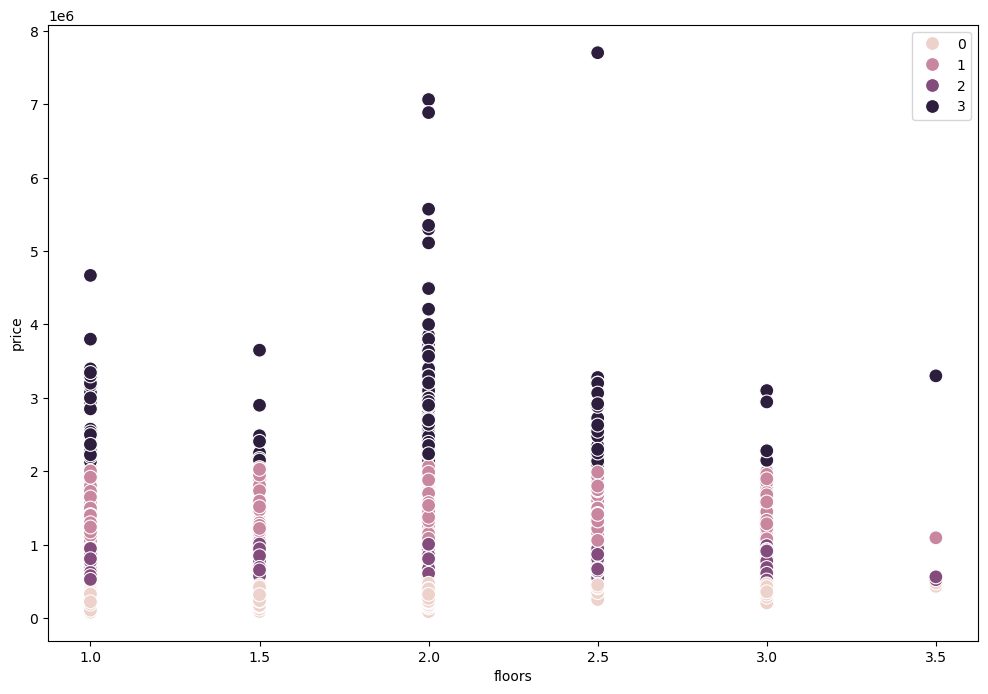

In [35]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['floors'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

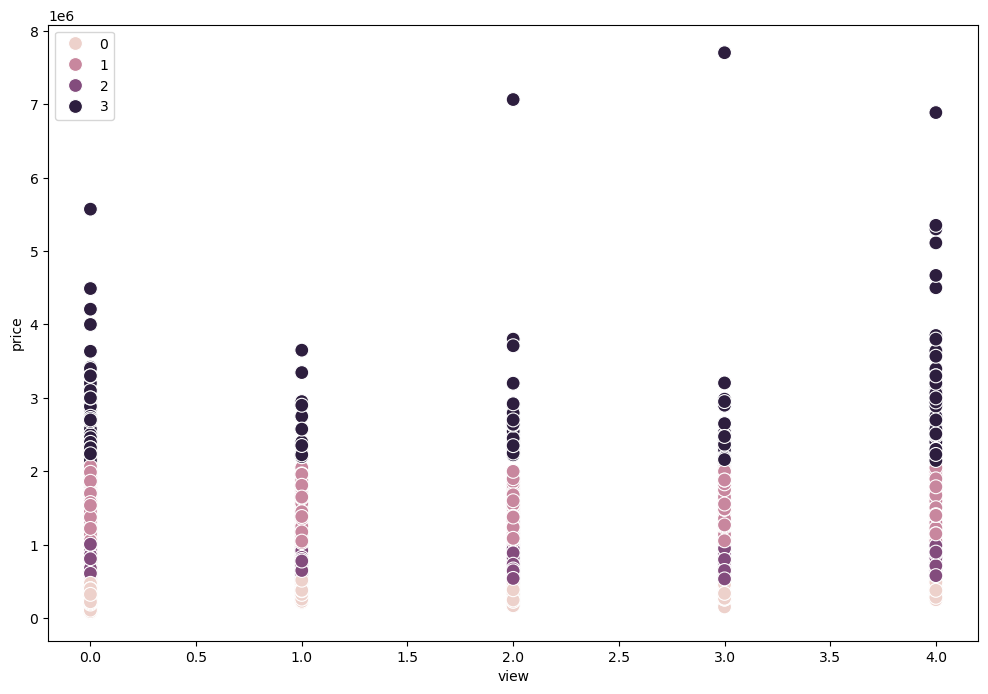

In [36]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['view'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

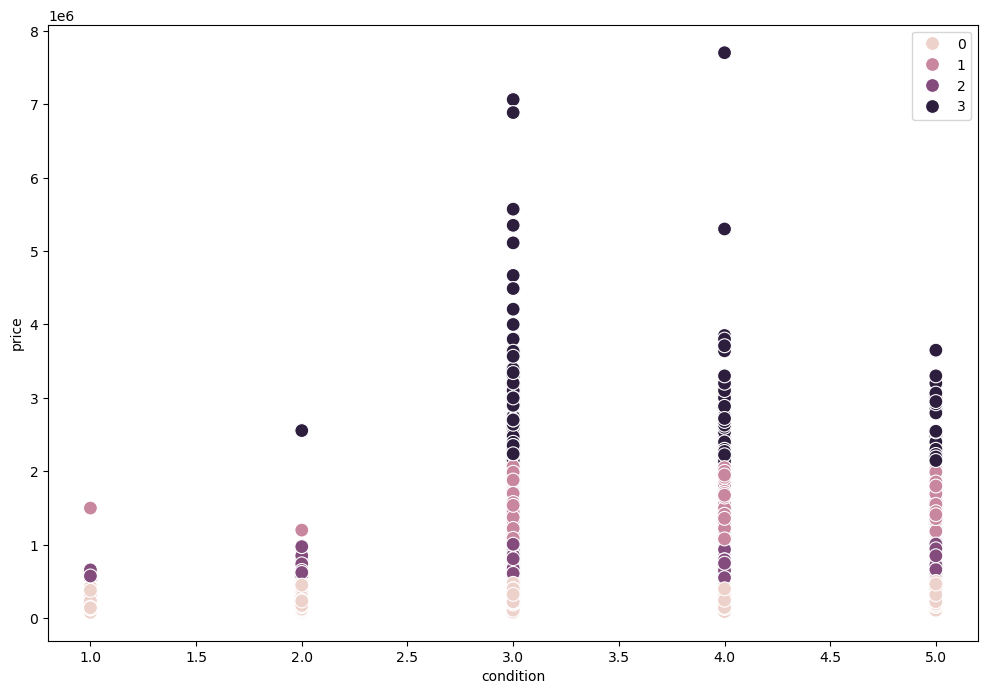

In [37]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['condition'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

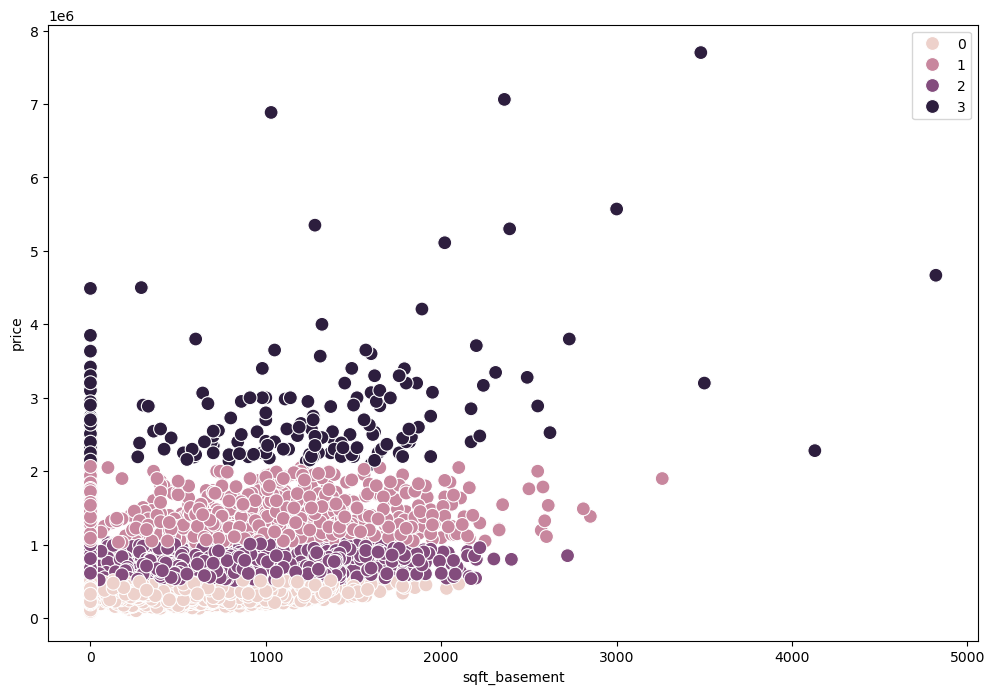

In [38]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['sqft_basement'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

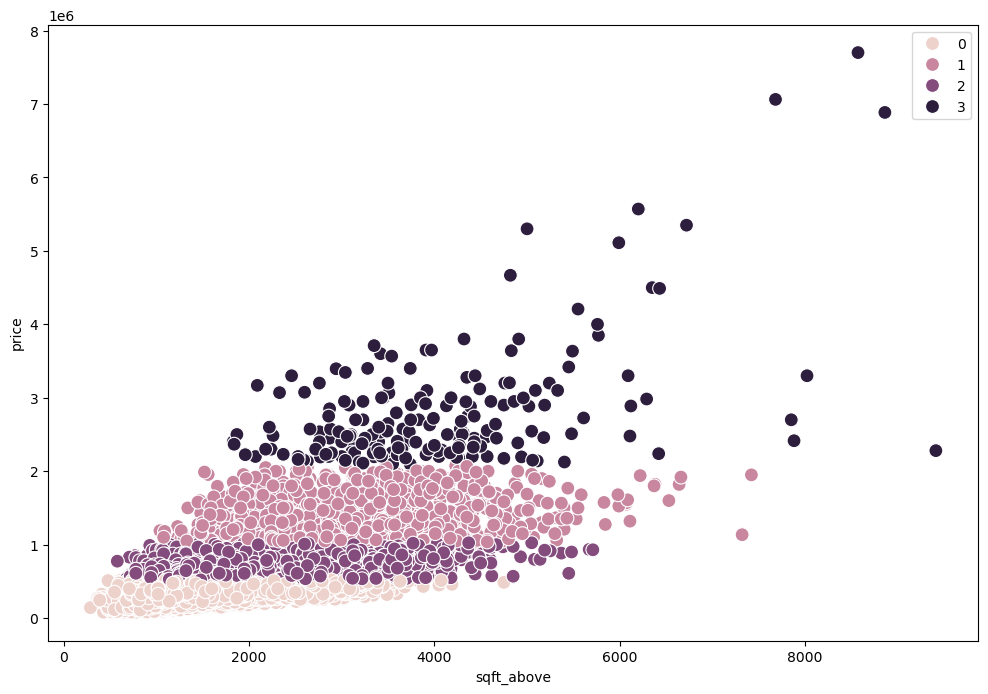

In [39]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['sqft_above'], y=df_numerical['price'], hue = Kmeans.labels_, s=100)

#### 3.2 Descriptive statistics and insights

In [41]:
# Calculate descriptive statistics for each cluster

df_numerical.loc[df_numerical['clusters'] == 3, 'clusters'] = 'dark purple'
df_numerical.loc[df_numerical['clusters'] == 2, 'clusters'] = 'purple'
df_numerical.loc[df_numerical['clusters'] == 1, 'clusters'] = 'light purple'
df_numerical.loc[df_numerical['clusters'] == 0, 'clusters'] = 'light pink'

df_numerical.groupby('clusters').agg({
    'age': ['mean', 'median'], 
    'years_since_renovation': ['mean', 'median'], 
    'sqft_living': ['mean', 'median'], 
    'price': ['mean', 'median'],
    'bedrooms': ['mean', 'median'],
    'bathrooms': ['mean', 'median'],
    'sqft_lot': ['mean', 'median'],
    'grade': ['mean', 'median'],
    'condition': ['mean', 'median'],
    'view': ['mean', 'median']
})

C:\Users\ashle\AppData\Local\Temp\ipykernel_21488\1639863634.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_numerical.loc[df_numerical['clusters'] == 3, 'clusters'] = 'dark purple'


age        years_since_renovation         sqft_living  \
                   mean median                   mean median         mean   
clusters                                                                    
dark purple   51.742105   37.5              44.200000   29.0  5094.152632   
light pink    53.683337   54.0              52.166860   51.0  1677.488307   
light purple  48.658756   38.5              42.106383   33.0  3633.223404   
purple        52.524368   46.0              49.436007   41.0  2458.697915   

                             price             bedrooms        bathrooms  \
              median          mean     median      mean median      mean   
clusters                                                                   
dark purple   4730.0  2.806109e+06  2528500.0  4.352632    4.0  3.873684   
light pink    1600.0  3.455521e+05   345000.0  3.158987    3.0  1.859304   
light purple  3530.0  1.360745e+06  1296325.0  4.032733    4.0  3.074059   
purple        2400.0  6.901801e+05   660000.0  3.608311    4.0  2.363800   

                         sqft_lot               grade        condition         \
             median          mean   median       mean median      mean median   
clusters                                                                        
dark purple    3.75  23010.052632  15972.0  10.752632   11.0  3.505263    3.0   
light pink     1.75  12030.897276   7500.0   7.125955    7.0  3.384117    3.0   
light purple   3.00  23487.763502  10348.0   9.637480   10.0  3.465630    3.0   
purple         2.50  18989.727599   7465.0   8.191357    8.0  3.442496    3.0   

                  view         
                  mean median  
clusters                       
dark purple   2.010526    2.0  
light pink    0.080265    0.0  
light purple  1.125205    0.0  
purple        0.312992    0.0

**Dark Purple:**
- Age: slightly older homes with an average of 51.7 years
- Years since renovation: moderate to more recently renovated, with an average of 44 years
- Square footage: the largest houses with an average of 5,094 sqft of living space
- Price: the most expensive houses with an average price of $2.8 million
- Bedrooms/Bathrooms: 4 bedrooms and 3.5-4 bathrooms
- Lot size: large lot size with an average of 23,010 sqft
- Grade/Condition: Highest grade and condition with an average grade of 10-11 and condition of 3.5
- View: strongest view score with an average of 2.01

    **Insight:** This cluster likely represents the most luxerious houses, with the highest prices, largest square footage, and premium features (best views, best grades). These could be luxury houses in highly desireable areas. 

**Light Pink:**
- Age: homes are older with a mean of 52.5 years
- Years since renovation: moderate, with a mean of 49.5 years
- Square footage: on the smaller side with an average of 2456 sqft
- Price: mid-range with an average of $689k
- Bedrooms/Bathrooms: 3-4 bedrooms, 2-3 bathrooms
- Lot size: large with an average of 18,993 sqft
- Grade/Condition: average to above average (grade 8, condition 3-4)
- View: minimal with an average of 0.31

    **Insight:** This cluster likely represents mid-range, older homes on larger lots. They have average grades and conditions and limited views. This could correspond with homes in suburban or rural areas where larger lots are common, but the homes are older and less luxurious.

**Light Purple:**
- Age: slightly newer homes with an average of 48.7
- Years since renovation: moderate to more recently renovated, with an average of 42 years
- Square footage: larger homes with an average of 3,632 sqft
- Price: higher-end with an average of $1.35 million
- Bedrooms/Bathrooms: around 4 bedrooms, 3 bathrooms
- Lot size: very large lots with an average of 23,428 sqft
- Grade/Condition: higher-end with an average grade of 9.6 and condition 3.47
- View: slightly better views with an average of 1.13 

    **Insight:** This cluster likely represents upscale properties with larger square footage, high grades, and better views. These are likely luxurious houses, possibly in wealthier suburban areas with spacious lots and high end features. 

**Purple:**
- Age: the oldest houses with an average of 53.7 years
- Years since renovation: long time since last renovated with an average of 52 years
- Square footage: the smallest houses with an average of 1676 sqft
- Price: lowest price, more affordable with an average price of $345K
- Bedrooms/Bathrooms: around 3 bedrooms and 1.5-2 bathrooms
- Lot size: smaller lot sizes with an average of 12,019 sqft
- Grade/Condition: average grade and condition (mean grade of 7 and condition of 3)
- View: very limited views with an average view score of 0.08

**Insight:** This cluster likely represents older, smaller, more affordable homes with lower grades and fewer amenities. These could be starter homes or homes in less desirable/less wealthy neighborhoods. 

**Given these results, next steps for an analytical pipeline would be to run separate regression analyses for each cluster to explore how different features influence price within each group.**

- Light pink: Focus on how lot size or age affects the price for mid-range, suburban homes.
- Light purple and dark purple: Focus on the impact of sqaure footage and views on luxury house prices.
- Purple: Foxus on affordability factors like house age, condition, and renovations.

### 5. Export data

In [45]:
house_sales.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'house_sales_updated.csv'))